In [12]:
from functions import *  #this allows the use of all the functions as if they were defined inside this file

This part is to check the settings.ini file and its parameters.

In [13]:
f = open('settings.ini')
settings = json.load(f)
 
for i in settings:
    print(i, end=': ')
    print(settings[i])
 
f.close()

fSampling: 10000000.0
quantizationBits: 16
scenarioDuration: 5.05
SV_PRN_ID: 1
CRCpolynomial: A23DCB
SYNCpattern: 0101100000
TAILpattern: 000000
SVIDlength: 6
MIDlength: 4
MBODYlength_TX: 80
MBODYlength_ACK: 30
CRClength: 24
nPRN_x_Symbol: 1
nChip_x_PRN: 4092
chipRate: 1023000.0
maxDoppler: 100000.0


The N_ACK.csv file is coming from the user receiver, it contains the message ID and if that message needs to be ACK or NACK

In [14]:
f = open('N_ACK.csv')
csv_file = csv.reader(f)
N_ACK = []
for row in csv_file:
        N_ACK.append(row)


for i in range(len(N_ACK)-1):
    if(N_ACK[i+1][1]=='1'):
        msg=createMessageACK(settings['SYNCpattern'],settings['SV_PRN_ID'],int(N_ACK[i+1][0]))
    if(N_ACK[i+1][1]=='0'):
        msg=createMessageNACK(settings['SYNCpattern'],settings['SV_PRN_ID'],int(N_ACK[i+1][0]))
    print(msg)

[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0

This part plots the origina orbital data regarding the Doppler shift, and also che interpolated Doppler shift from the function GetDopplerShift,
wich returns the interpolated Doppler shift at arbitrary sampling period, number of samples and starting time.

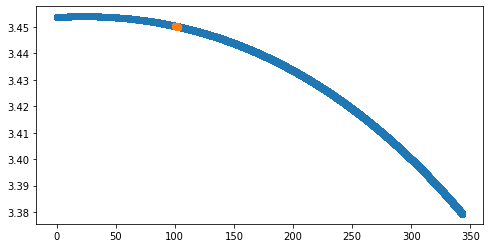

In [15]:
orbitalData = pd.read_csv('OrbitalDATA.txt', delim_whitespace=True)

dopplerFreqSamples = orbitalData['DopplerShift[Hz]'].dropna().to_numpy()
originalSamplingPeriod = 0.01
interpSamplingPeriod = 2.44E-6
StartTime = 100
numInterpSamples=1000000 

interpDopplerShift=GetDopplerShift(dopplerFreqSamples, originalSamplingPeriod, StartTime, numInterpSamples, interpSamplingPeriod)

SampleTime = (np.asarray(range(0,len(dopplerFreqSamples))))*originalSamplingPeriod
InterpSampleTime = (np.asarray(range(0,numInterpSamples)))*interpSamplingPeriod
InterpSampleTime = np.asarray([i+StartTime for i in InterpSampleTime])

plt.figure(figsize=(8, 4))
plt.scatter(SampleTime, dopplerFreqSamples)
plt.scatter(InterpSampleTime, interpDopplerShift)

This parts does the same interpolation process, but for FSPL

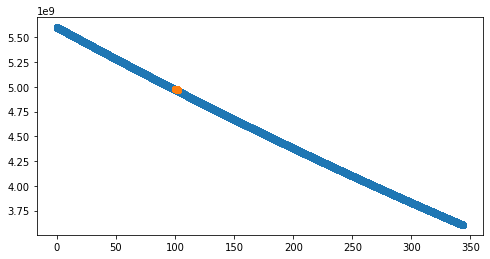

In [16]:
FSPL_Samples = orbitalData['FSPL'].dropna().to_numpy()

SampleTime = (np.asarray(range(0,len(FSPL_Samples))))*originalSamplingPeriod
originalSamplingPeriod = 0.01
interpSamplingPeriod = 2.44E-6
StartTime = 100
numInterpSamples=1000000 

interpDopplerShift=GetFSPL(FSPL_Samples, originalSamplingPeriod, StartTime, numInterpSamples, interpSamplingPeriod)


InterpSampleTime = (np.asarray(range(0,numInterpSamples)))*interpSamplingPeriod
InterpSampleTime = np.asarray([i+StartTime for i in InterpSampleTime])

plt.figure(figsize=(8, 4))
plt.scatter(SampleTime, FSPL_Samples)
plt.scatter(InterpSampleTime, interpDopplerShift)

Quantizing the I and Q samples (randomly created in this example)

In [17]:
Iarray = (np.random.rand(100)-0.5)*2.2
Qarray = (np.random.rand(100)-0.5)*2.2

print("I and Q samples:")
print(Iarray[0:5])
print(Qarray[0:5])

Iarray = quantizationBounds(Iarray,16,-1,1)
Qarray = quantizationBounds(Qarray,16,-1,1)

print("I and Q samples after quantization:")
print(Iarray[0:5])
print(Qarray[0:5])

I and Q samples:
[-0.66765638 -0.40770859 -0.58626656 -0.58943339  0.70667427]
[ 0.8145514   0.87060992  0.93944517  0.05987341 -0.02299573]
I and Q samples after quantization:
[ 1949  3473  2426  2407 10009]
[9100 9381 9726 5315 4899]


Writing the samples inside a file, first a binary one and then a text (human readable one)

In [18]:
writeFileBin("signal.bin",Iarray,Qarray)

writeFileChar("signal.txt",Iarray,Qarray)

Another choice for quantization could be to truncate our values (floating point of some length) into floating point of 16 bits.
To achieve this, we use the float16 type given by the numpy module. 
This type is structured as:
1 sign bit, 5 bits exponent, 10 bits mantissa.
Of course, the receiver must be aware of this choiche.

In [19]:
Iarray = (np.random.rand(100)-0.5)*2.2
Qarray = (np.random.rand(100)-0.5)*2.2

print("I and Q samples:")
print(Iarray[0:5])
print(Qarray[0:5])

Iarray = quantizationFloat(Iarray,16)
Qarray = quantizationFloat(Qarray,16)
 
print("I and Q samples truncated to 16 bit floats:")
print(Iarray[0:5])
print(Qarray[0:5])

I and Q samples:
[-0.68560348 -1.02759285 -1.04144819 -0.56697602  0.25411151]
[ 0.21231242  0.95636119 -0.02377223  0.20437016 -0.75160173]
I and Q samples truncated to 16 bit floats:
[-0.6855 -1.027  -1.041  -0.567   0.2542]
[ 0.2123   0.9565  -0.02377  0.2043  -0.7515 ]


After that, we can write our I Q samples into a binary file, producing the final output.

In [20]:
writeFileFloat("signalFloat.bin",Iarray,Qarray)